# 1. Read the dataset to python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'C:\Users\Dell\Downloads\iris (2).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data analysis

In [3]:
data.shape

(150, 5)

In [4]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for missing values

In [6]:
data.isna().sum()       

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

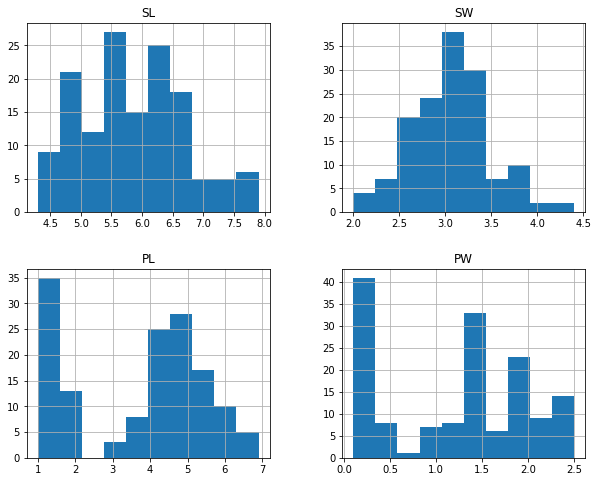

In [7]:
data.hist(figsize=(10,8))      # All features don't follow Gaussian distribution

<AxesSubplot:>

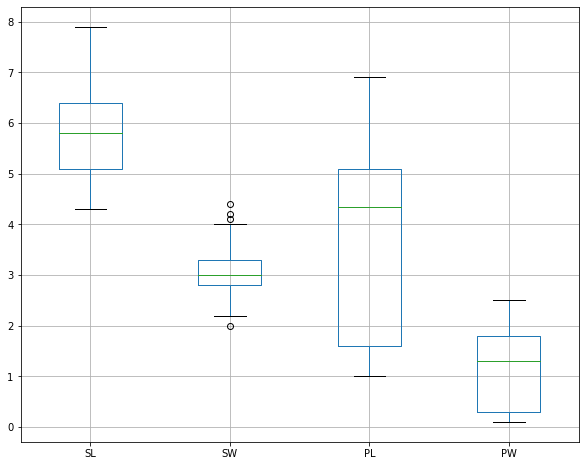

In [8]:
data.boxplot(figsize=(10,8))        

### Filling/ imputing missing values

In [9]:
freq=data.select_dtypes(include=['float'])  

In [10]:
for i in freq:
    data[i]=data[i].fillna(data[i].median())
    print(i)


SL
SW
PL
PW


In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Outlier Detection and removing outliers

Text(0.5, 1.0, 'Box plot of SW column ')

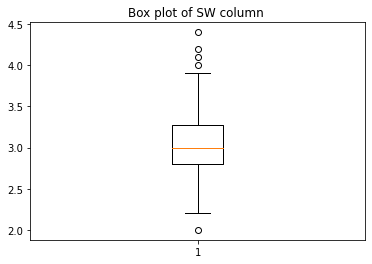

In [12]:
plt.boxplot(data['SW'])                             
plt.title('Box plot of SW column ')

In [13]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [14]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [15]:
IQR = Q3-Q1

In [16]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [17]:
outlier = []
for x in data['SW']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [18]:
data[data['SW']<low_lim].index

Int64Index([60], dtype='int64')

In [19]:
data[data['SW']>up_lim].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [20]:
data.drop([14, 15, 32, 33,60],inplace=True)

### Splitting independent and dependent variables

In [21]:
x=data.drop('Classification',axis=1)

In [22]:
y=data['Classification']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=143,test_size=0.2)

## Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Mohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.9310344827586207


## KNN Classifier Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9310344827586207


In [27]:
knn_acc=[]
for i in range(5,16,2):    # 2 inside means takes values 5,7,9,.....
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    knn_acc.append(acc)

In [28]:
knn_acc

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207]

## Desicion Tree Model 

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9310344827586207


## Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy of Random Forest Model is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9655172413793104


# Comparing the accuracies Random Forest model is the most accurate  with accuracy 96.5%. Therefore it is the best model.